# DSCI 100 - Individual Project Portion - Nicholas Huang, Section 3, Group 8

# 1 | Data Description

## Descriptive Summary of Dataset

players.csv has 196 rows and 7 columns / variables of information, with delimiter ",". These variables are:

| Variable   | Description                                                       | Data Type |
|------------|-------------------------------------------------------------------|-----------|
|experience  |The amount of experience a player has                              |character  |
|subscribe   |If the player is subscribed to a game related newsletter           |logical    |
|hashedEmail |Conversion of the player's email into a unique string of characters|character  | 
|played_hours|Number of hours the player has played on the PLAICraft.ai server   |double     |
|name        |The name of the player                                             |character  |
|gender      |The gender of the player                                           |character  |
|Age         |The age of the player                                              |double     |

sessions.csv has 1535 rows and 5 columns / variables of information, with delimiter ",". These variables are:

| Variable           | Description                                                       | Data Type |
|--------------------|-------------------------------------------------------------------|-----------|
|hashedEmail         |Conversion of the player's email into a unique string of characters|character  | 
|start_time          |The start time of that particular play session, in dd/mm/yyyy hh:mm|character  |
|end_time            |The end time of that particular play session, in dd/mm/yyyy hh:mm  |character  |
|original_start_time |Start time, formatted as UNIX epoch time in milliseconds           |double     |
|original_end_time   |End time, formatted as UNIX epoch time in milliseconds             |double     |

there are 4 quantitative variables 

## Problems

There are a few problems within each dataest that immediately stand out, and probably a few more that won't be noticed until actually trying to wrangle the data or do data analysis on it. Some of these problems include:
- the fact that "experience" is vague, and can often be subjective when it comes to playing games. Especially when using one word to describe it, such as "Pro" or "Veteran," it's hard to quantify or reliably compare between different experience levels when they aren't put on a clear scale
- within the "sessions" dataset, we are only given the hashedEmail, and no other identifier tools. This means that, if we wanted to solely use the sessions dataset alongside the players dataset, we would need to match the hashedEmail identifier to each player in order to identify them
- the start time and end time are read into R as characters, as it is not provided in the standard ISO 8601 date time format that R recognizes. This means that to make use of it with our tidymodels tools, such as applying functions like "filter" onto it, we would need to manually convert its type into date-time, or another useful format for us.
- the original start time and end time are not provided in formats that are particularly interpretable or useful
- experience and gender are read in as characters, but are categorical variables

These are just some of the problems that are prevalent when initially viewing the dataset. Additional problems will likely come up as data analysis is performed on these datasets.

# 2 | Questions

## Broad Question Chosen

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**And within this broad question, the specific question I have chosen is:**

Can the age of the Minecraft player and the number of hours they have played on the server predict whether or not they are subscribed to any game related newsletters?

The "players" dataset will clearly address this question of interest, as it provides data on both the age of an individual player, the number of hours they have played on the server, as well as whether or not they are subscribed to any game related newsletters.

In order to do this, I would most likely have to wrangle the players data set in order to select only the columns of interest, which would be "Age," "played_hours," and "subscribe." From there, the data needs to be standardized, by applying the appropriate centering and scaling functions to it. After that, the K-NN classification methods we learned in class can be applied to this dataset in order to achieve some sort of predictive model, using age and hours played as the predictors, and whether or not they are subscribed as the response.

# 3 | Exploratory Data Analysis and Visualization

## Loading data into R and wrangling

In [6]:
library(tidyverse)
library(tidymodels)

**Reading in players and session data using link directly from GitHub**

In [24]:
session_url <- "https://raw.githubusercontent.com/nhuang07/dsci_project_8/refs/heads/main/data/sessions.csv"
players_url <- "https://raw.githubusercontent.com/nhuang07/dsci_project_8/refs/heads/main/data/players.csv"

players <- read_csv(players_url)
session <- read_csv(session_url)

head(players)
head(session)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


**Tidying the data**

As the "sessions" dataset is not useful for my chosen question, I will not be including wrangling work to tidy it.

In [25]:
# changing appropriate variable types to factor

players <- players |>
                mutate(experience = as_factor(experience)) |>
                mutate(gender = as_factor(gender))
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


This is all the work necessary to tidy the "players" dataset, as it already has one variable per column, one observation per row, and one value per cell.

**Computing the mean of the quantitative variables for the datasets**

In [26]:
# for players dataset

mean_players <- players |>
                    select(played_hours, Age) |>
                    map_df(mean, na.rm = TRUE)
mean_players

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


**Exploratory visualization of the data**

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


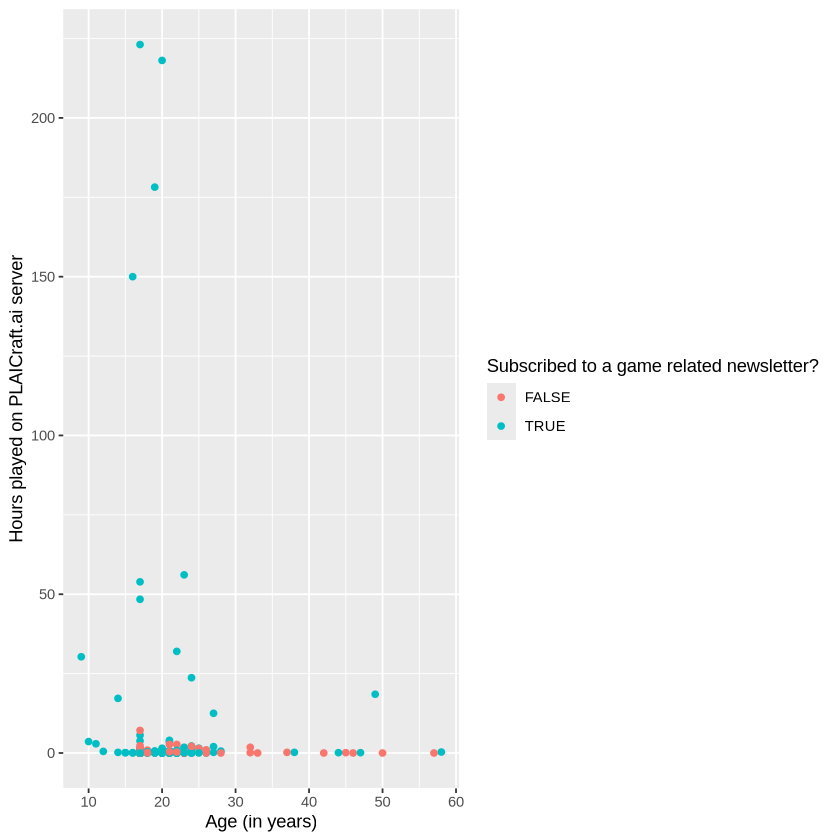

In [29]:
# plot of age on the x-axis and played_hours on the y-axis, coloured in with "subscribe" variable

age_to_played_hours_plot <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
                                geom_point() +
                                labs(x = "Age (in years)",
                                     y = "Hours played on PLAICraft.ai server",
                                     color = "Subscribed to a game related newsletter?")
age_to_played_hours_plot

As seen from the plot above, this dataset seems like it could produce some meaningful results on both how hours played on the server as well as an individual's age can predict whether or not they are subcribed to a game related newsletter. This can be seen above with all the individuals that have significantly more hours played than the others being subscribed to a newsletter, as well as a higher conentration of blue coloured data points in the area with younger aged players.

Some immediately evident problems include the extreme imbalance and sparsity of data points, some potential class imbalance between number of FALSE and TRUE datapoints, as well as the fact that this is a relatively small dataset. However, most, if not all of these problems can be addressed using methods we learned in class, such as centering and scaling, cross validation, and more.

# 4 | Methods and Plan

# 5 | GitHub Repository
https://github.com/nhuang07/dsci_project_8/tree/main